In [137]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
%matplotlib inline

#### Check out the data

In [138]:
# merging two csv files 
# student_data = pd.read_csv('combined_file.csv')
#student_data = pd.concat(map(pd.read_csv, ['student-mat.csv', 'student-por.csv']), ignore_index=True)

# Read the CSV files
df1 = pd.read_csv('student-mat.csv', sep=';')
df2 = pd.read_csv('student-por.csv', sep=';')

# Merge the two dataframes
student_data = pd.concat([df1, df2])

student_data.to_csv("combined.csv", index=False)

##### Understand the data

In [139]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [140]:
student_data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [141]:
student_data.drop(columns=student_data.columns[0], axis=1,  inplace=True)

In [142]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    10

In [143]:
student_data.drop_duplicates()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,4,3,4,1,1,3,6,5,6,6
1,F,17,U,GT3,T,1,1,at_home,other,course,...,5,3,3,1,1,3,4,5,5,6
2,F,15,U,LE3,T,1,1,at_home,other,other,...,4,3,2,2,3,3,10,7,8,10
3,F,15,U,GT3,T,4,2,health,services,home,...,3,2,2,1,1,5,2,15,14,15
4,F,16,U,GT3,T,3,3,other,other,home,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,F,19,R,GT3,T,2,3,services,other,course,...,5,4,2,1,2,5,4,10,11,10
645,F,18,U,LE3,T,3,1,teacher,services,course,...,4,3,4,1,1,1,4,15,15,16
646,F,18,U,GT3,T,1,1,other,other,course,...,1,1,1,1,1,5,6,11,12,9
647,M,17,U,LE3,T,3,1,services,services,course,...,2,4,5,3,4,2,6,10,10,10


In [144]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1044 entries, 0 to 648
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   address     1044 non-null   object
 3   famsize     1044 non-null   object
 4   Pstatus     1044 non-null   object
 5   Medu        1044 non-null   int64 
 6   Fedu        1044 non-null   int64 
 7   Mjob        1044 non-null   object
 8   Fjob        1044 non-null   object
 9   reason      1044 non-null   object
 10  guardian    1044 non-null   object
 11  traveltime  1044 non-null   int64 
 12  studytime   1044 non-null   int64 
 13  failures    1044 non-null   int64 
 14  schoolsup   1044 non-null   object
 15  famsup      1044 non-null   object
 16  paid        1044 non-null   object
 17  activities  1044 non-null   object
 18  nursery     1044 non-null   object
 19  higher      1044 non-null   object
 20  internet    10

In [145]:
df_corr = student_data

df_corr.drop(['address','Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=True)

df_corr['sex'] = df_corr['sex'].map({'F': 0, 'M': 1})

df_corr['famsize'] = df_corr['famsize'].map({'LE3': 0, 'GT3': 1})

df_corr['Pstatus'] = df_corr['Pstatus'].map({'A': 0, 'T': 1})

df_corr['schoolsup'] = df_corr['schoolsup'].map({'no': 0, 'yes': 1})

df_corr['famsup'] = df_corr['famsup'].map({'no': 0, 'yes': 1})

df_corr['paid'] = df_corr['paid'].map({'no': 0, 'yes': 1})

df_corr['activities'] = df_corr['activities'].map({'no': 0, 'yes': 1})

df_corr['nursery'] = df_corr['nursery'].map({'no': 0, 'yes': 1})

df_corr['higher'] = df_corr['higher'].map({'no': 0, 'yes': 1})

df_corr['internet'] = df_corr['internet'].map({'no': 0, 'yes': 1})

df_corr['romantic'] = df_corr['romantic'].map({'no': 0, 'yes': 1})

In [146]:
df_corr

,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,18,1,0,4,4,2,2,0,1,...,4,3,4,1,1,3,6,5,6,6
1,0,17,1,1,1,1,1,2,0,0,...,5,3,3,1,1,3,4,5,5,6
2,0,15,0,1,1,1,1,2,3,1,...,4,3,2,2,3,3,10,7,8,10
3,0,15,1,1,4,2,1,3,0,0,...,3,2,2,1,1,5,2,15,14,15
4,0,16,1,1,3,3,1,2,0,0,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,19,1,1,2,3,1,3,1,0,...,5,4,2,1,2,5,4,10,11,10
645,0,18,0,1,3,1,1,2,0,0,...,4,3,4,1,1,1,4,15,15,16
646,0,18,1,1,1,1,2,2,0,0,...,1,1,1,1,1,5,6,11,12,9
647,1,17,0,1,3,1,2,1,0,0,...,2,4,5,3,4,2,6,10,10,10


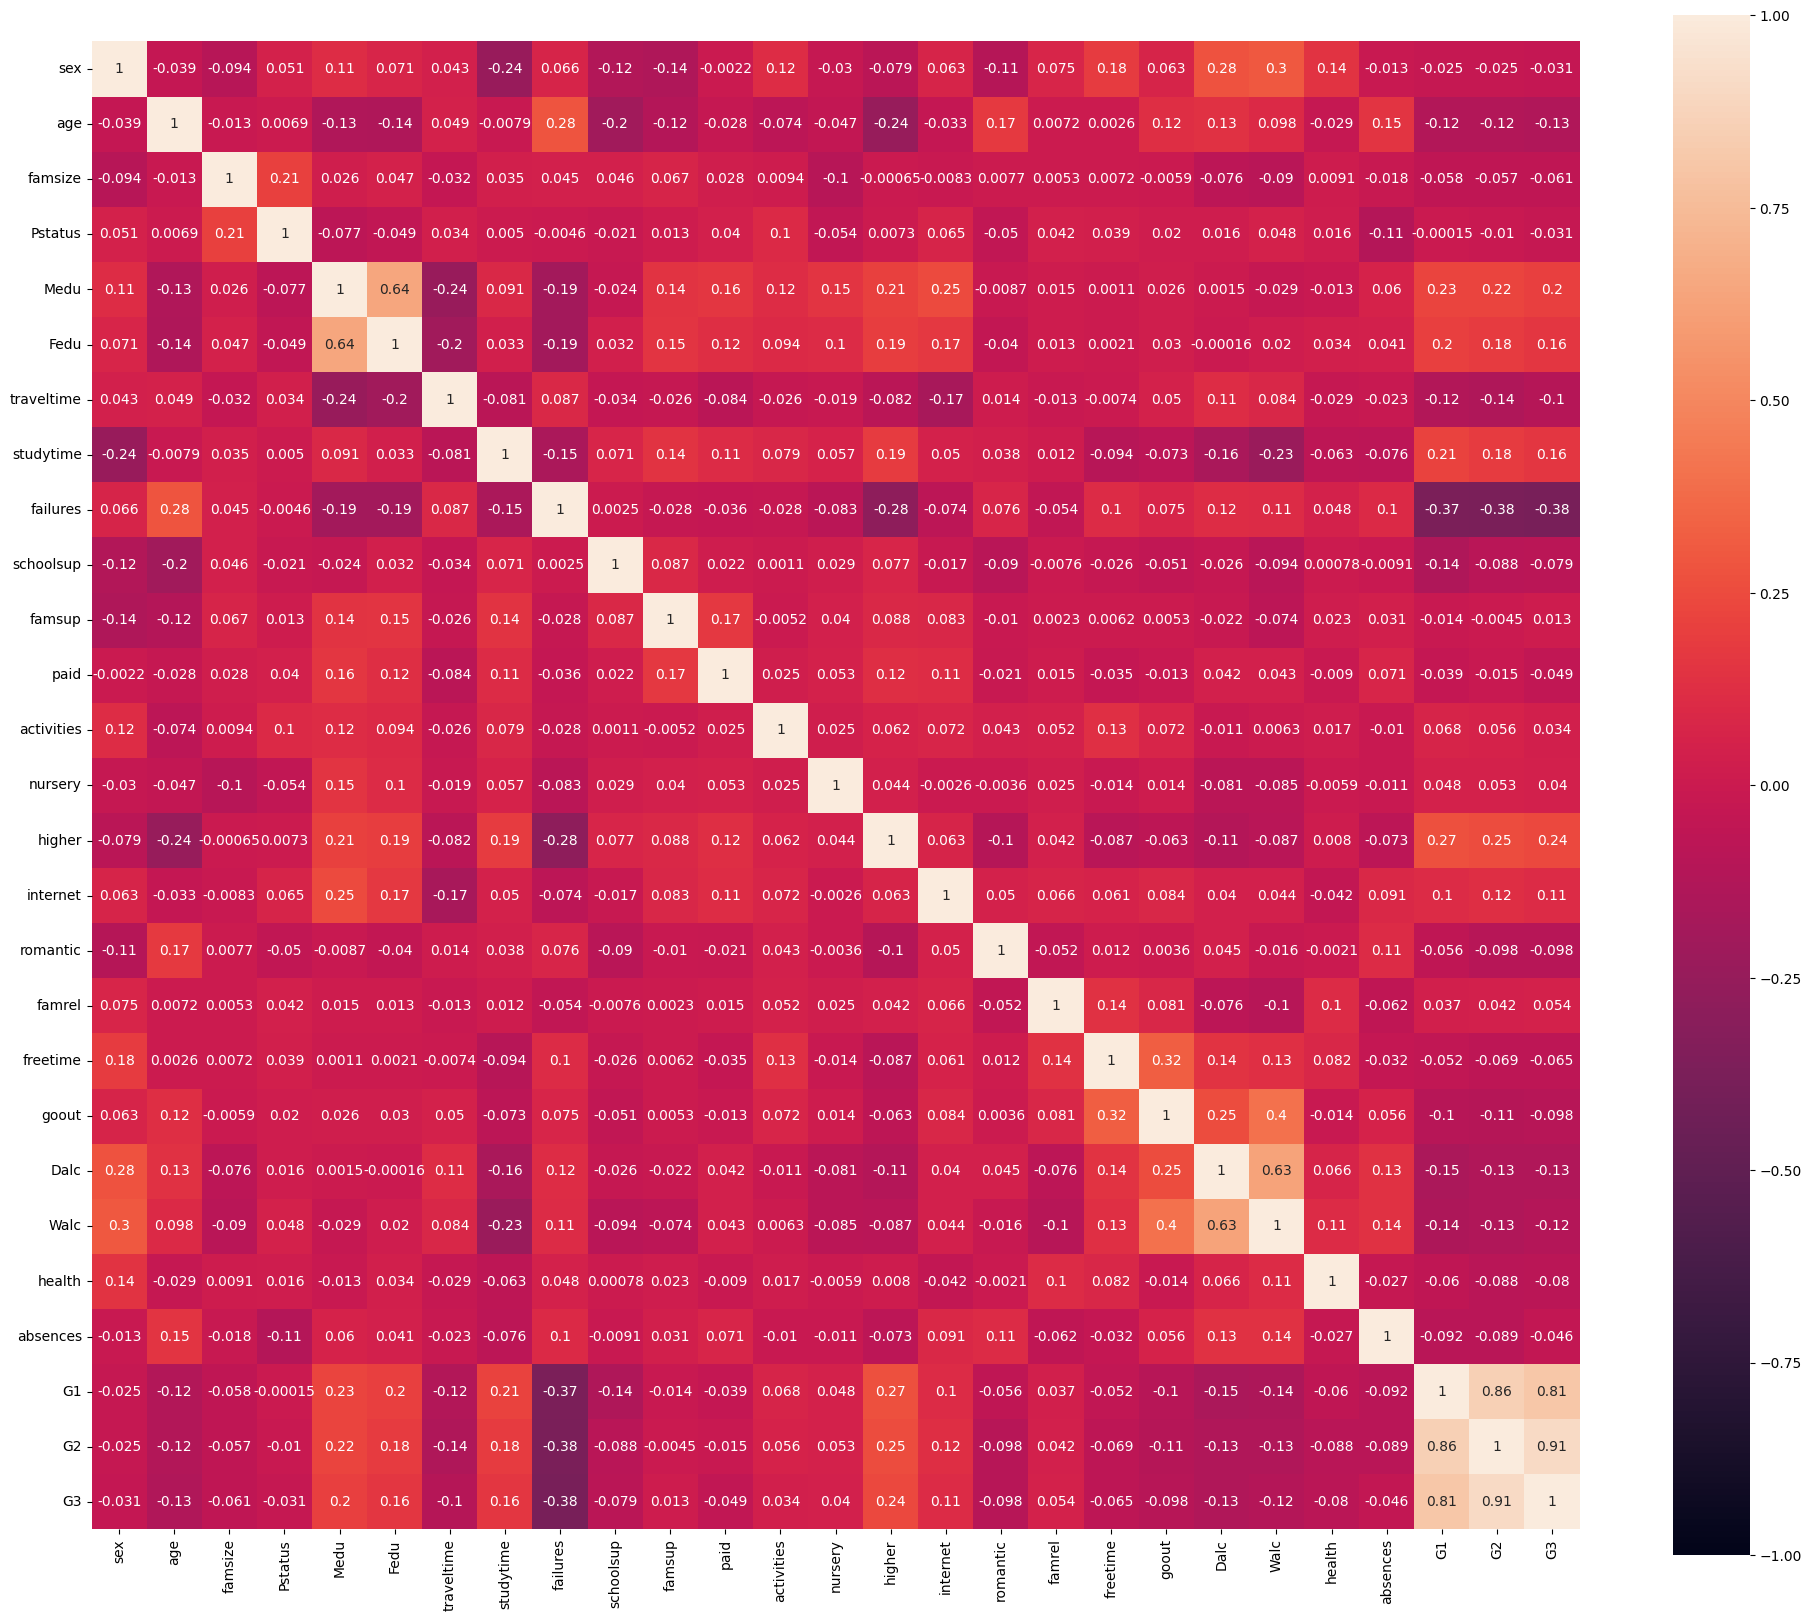

In [147]:
corr_matrix = df_corr.corr(numeric_only=True)
f,ax = plt.subplots(figsize=(24,20))
sns.heatmap(corr_matrix,vmin=-1,vmax=1, square = True, annot = True);

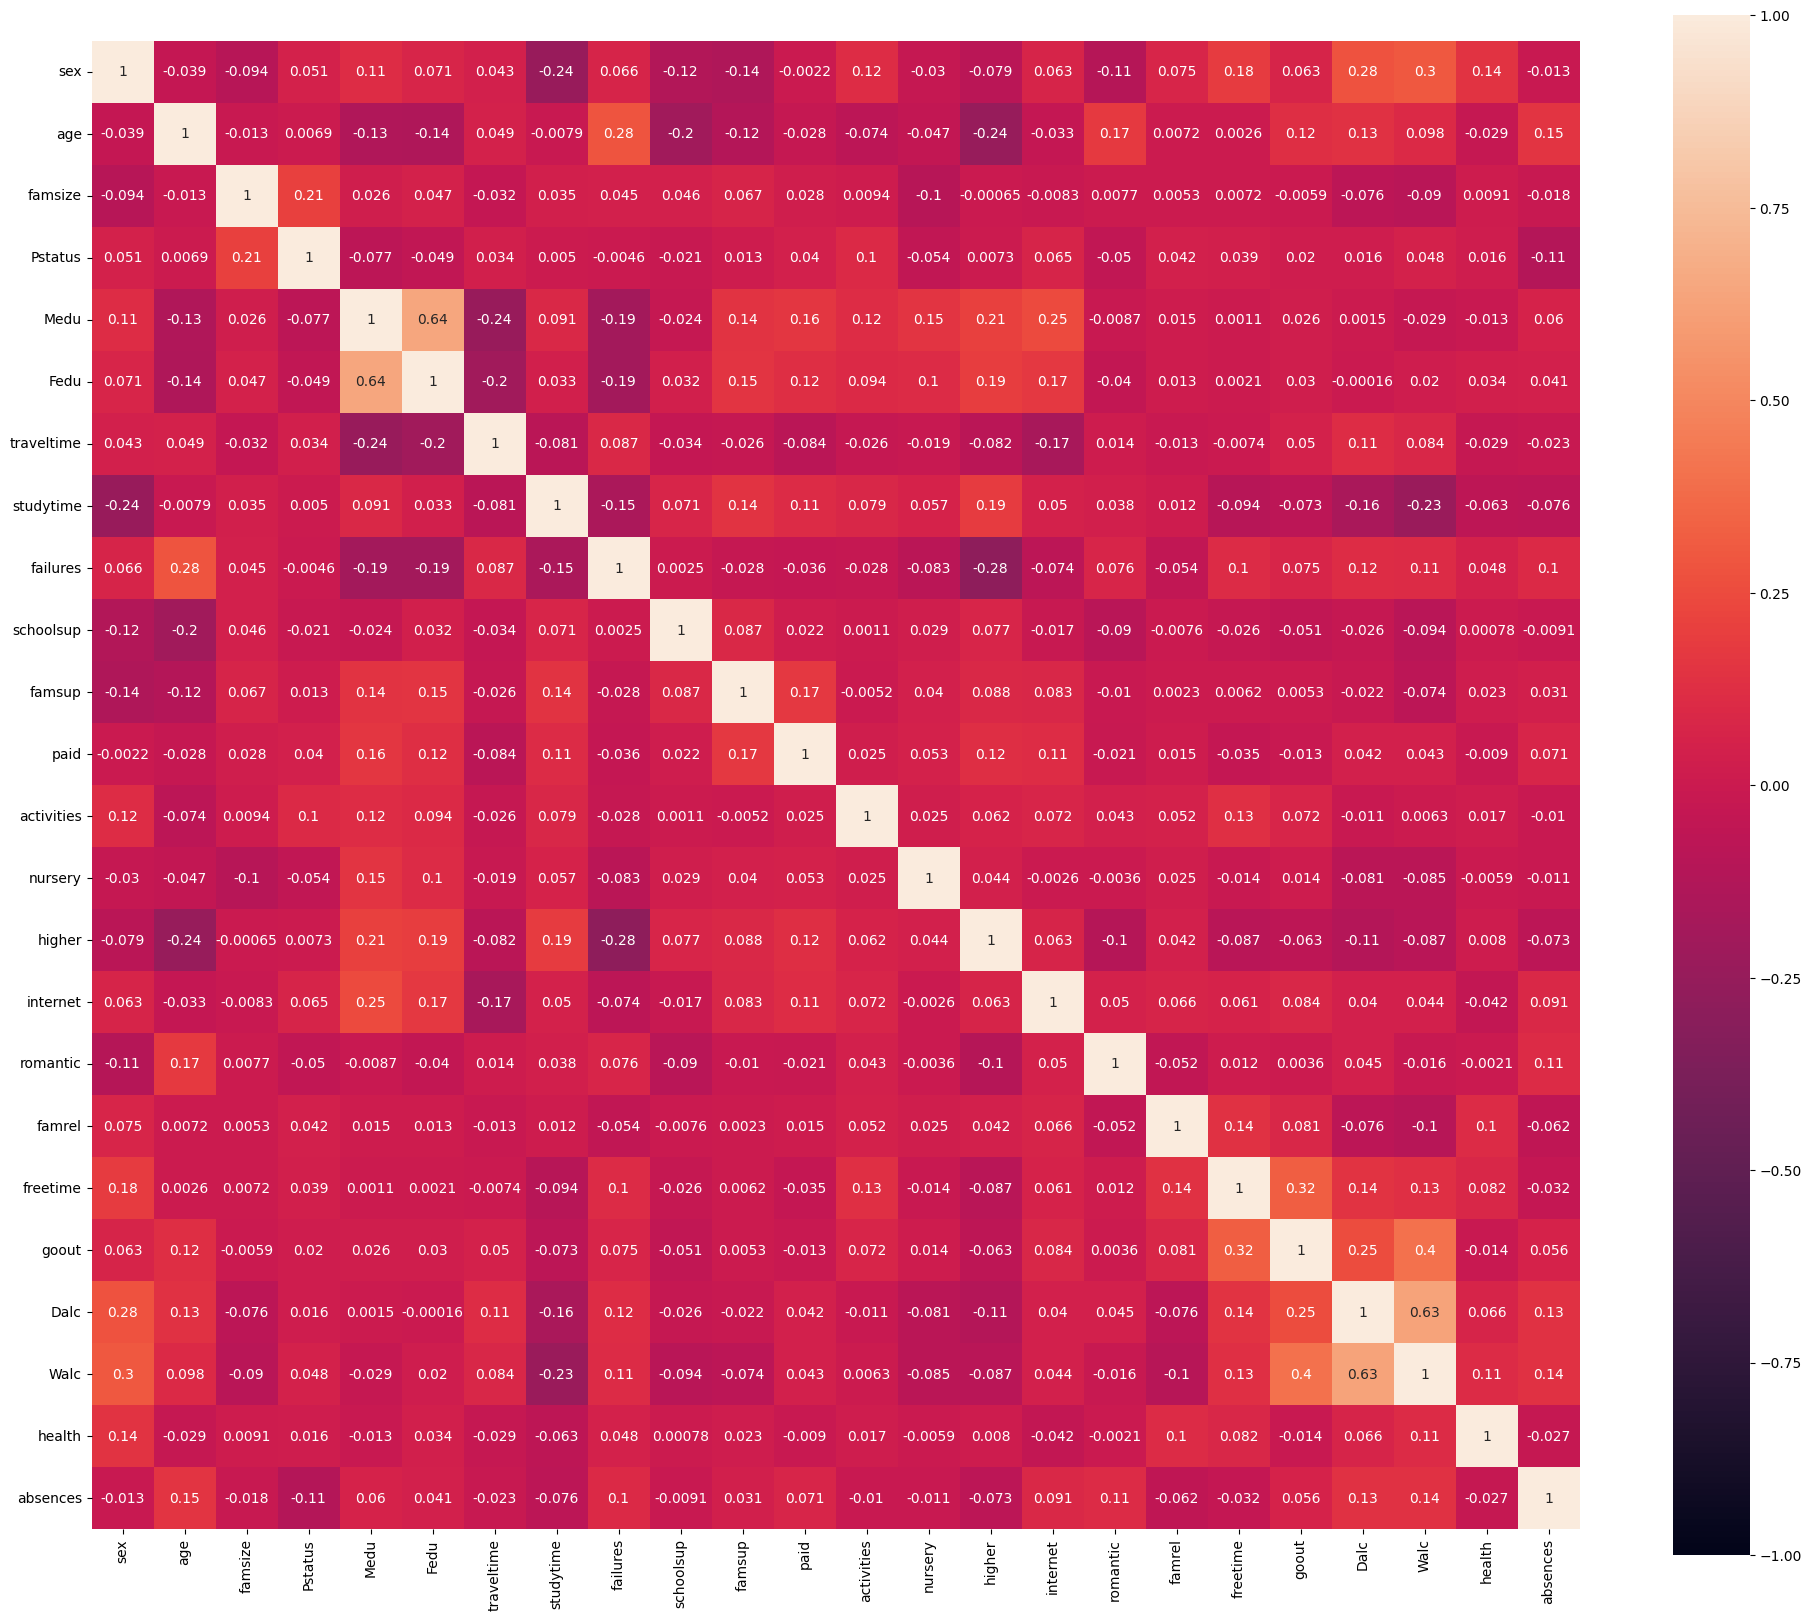

In [148]:
df_corr_2 = df_corr

df_corr_2.drop(['G1','G2','G3'], axis=1, inplace=True)

corr_matrix_2 = df_corr_2.corr(numeric_only=True)
f,ax = plt.subplots(figsize=(24,20))
sns.heatmap(corr_matrix_2,vmin=-1,vmax=1, square = True, annot = True);

In [167]:
top_corr = corr_matrix_2.unstack()
top_corr = top_corr[top_corr != 1]  # Filter out correlations with a value of '1'
top_10_corr = top_corr.nlargest(20)  # Get the top 10 correlations

# The result will be a Pandas Series with the top 10 correlations (excluding '1')
print(top_10_corr['failures'])

age    0.282364
dtype: float64


In [168]:
top_down_corr = corr_matrix.unstack()
top_down_10_corr = top_corr.nsmallest(20)  # Get the top 10 correlations

# The result will be a Pandas Series with the top 10 correlations (excluding '1')
print(top_down_10_corr['failures'])

higher   -0.284893
Fedu     -0.191390
Medu     -0.187769
dtype: float64


In [169]:
X = df_corr[['age', 'sex', 'famsup', 'famrel', 'paid','goout', 'activities' , 'Dalc', 'Walc']]
y = df_corr['failures']

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train


,age,sex,famsup,famrel,paid,goout,activities,Dalc,Walc
139,15,0,0,4,0,2,1,1,1
83,15,1,0,5,1,3,1,1,3
308,18,0,0,4,0,4,1,2,2
150,18,1,0,2,0,5,0,2,5
168,16,0,1,5,1,5,0,1,1
...,...,...,...,...,...,...,...,...,...
361,18,1,0,4,0,3,1,2,3
384,19,1,1,5,0,4,0,2,2
244,18,0,1,4,1,4,0,1,1
475,15,0,1,5,0,2,1,1,1


<Axes: xlabel='failures', ylabel='Count'>

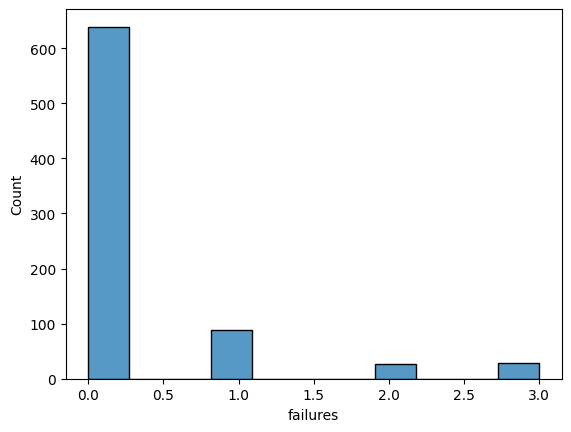

In [171]:
sns.histplot(y_train)


<Axes: xlabel='failures', ylabel='Count'>

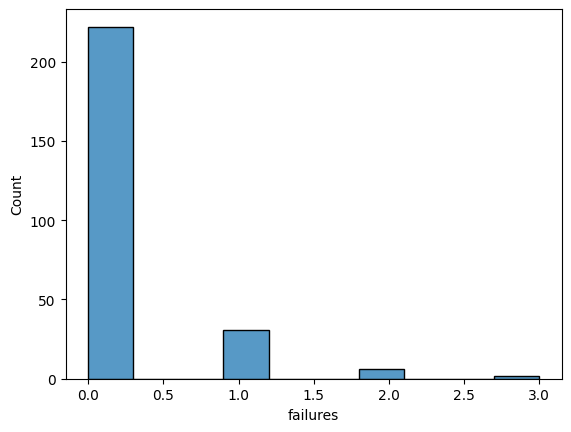

In [172]:
sns.histplot(y_test)

In [173]:
''' decision tree '''
clf = DecisionTreeClassifier(random_state=2021)

In [174]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [175]:
y_pred = clf.predict(X_test)
y_test

277    0
237    0
350    1
120    0
468    0
      ..
82     0
524    0
643    0
37     0
377    0
Name: failures, Length: 261, dtype: int64

#### Confusion Matrix

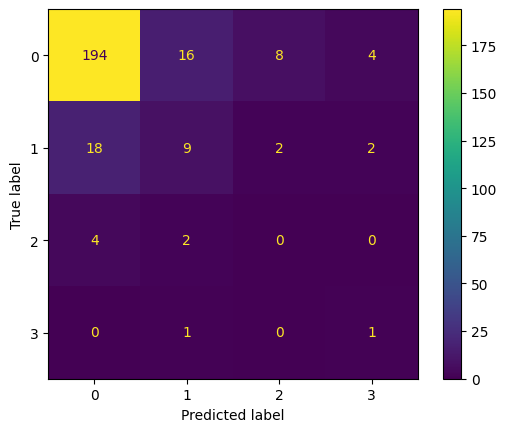

In [176]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred )
plt.show()

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89       222
           1       0.32      0.29      0.31        31
           2       0.00      0.00      0.00         6
           3       0.14      0.50      0.22         2

    accuracy                           0.78       261
   macro avg       0.34      0.42      0.35       261
weighted avg       0.80      0.78      0.79       261



In [178]:
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.2f}')


accuracy: 0.78


#### GridSearchCV

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
print(clf.get_depth())
print(clf.get_n_leaves())

16
173


In [130]:
param_grid_dt = {'criterion' : ['gini', 'entropy'], 'max_depth': [1,2,3,4,5,6,7]}
estimator_dt = DecisionTreeClassifier(random_state=2022)
grid_dt = GridSearchCV(estimator_dt, param_grid_dt, refit = True, verbose=2)

In [132]:
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=1; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=2; total time=   0.0s
[CV] END ........................criterion=gini, max_depth=3; total time=   0.0s
[CV] END ........................criterion=gini,

GridSearchCV(estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]},
             verbose=2)

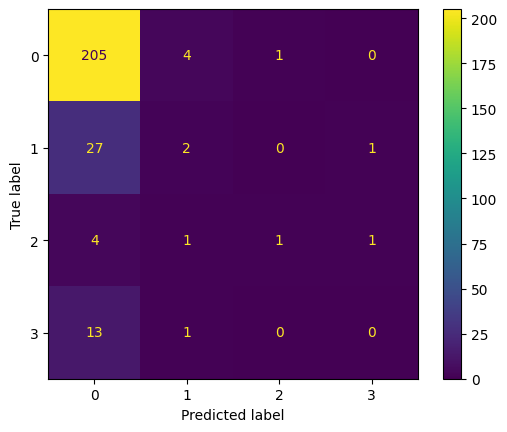

In [133]:
ConfusionMatrixDisplay.from_predictions(y_test, grid_dt.predict(X_test))
plt.show()

In [134]:
print(classification_report(y_test, grid_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       210
           1       0.25      0.07      0.11        30
           2       0.50      0.14      0.22         7
           3       0.00      0.00      0.00        14

    accuracy                           0.80       261
   macro avg       0.39      0.30      0.31       261
weighted avg       0.70      0.80      0.74       261



In [179]:
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.2f}')


accuracy: 0.78
